<a href="https://colab.research.google.com/github/AyorindeTayo/Fake-money-detection-/blob/master/Copy_of_fakemoneydetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [0]:
# Loading the data with the pandas read_csv attribute
from google.colab import files
files.upload()

Saving data_money.csv to data_money (2).csv


{'data_money.csv': b'4.0127,10.1477,-3.9366,-4.0728,0\r\n2.6606,3.1681,1.9619,0.18662,0\r\n3.931,1.8541,-0.02343,1.2314,0\r\n0.01727,8.693,1.3989,-3.9668,0\r\n3.2414,0.40971,1.4015,1.1952,0\r\n2.2504,3.5757,0.35273,0.2836,0\r\n-1.3971,3.3191,-1.3927,-1.9948,1\r\n0.39012,-0.14279,-0.03199,0.35084,1\r\n-1.6677,-7.1535,7.8929,0.96765,1\r\n-3.8483,-12.8047,15.6824,-1.281,1\r\n-3.5681,-8.213,10.083,0.96765,1\r\n-2.2804,-0.30626,1.3347,1.3763,1\r\n-1.7582,2.7397,-2.5323,-2.234,1\r\n-0.89409,3.1991,-1.8219,-2.9452,1\r\n0.3434,0.12415,-0.28733,0.14654,1\r\n'}

In [0]:
# Reading the dataset
def read_dataset():
    df=pd.read_csv('data_money.csv')
    data = pd.DataFrame(df)
    
    # print(len(df.columns))
    X = df[df.columns[0:4]].values
    y = df[df.columns[4]]
 
    # Encode the dependent variable
    Y = one_hot_encode(y)
    print(X.shape)
    return (X, Y)

In [0]:
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [0]:
# Read the dataset
X, Y = read_dataset()

(14, 4)


In [0]:
# Shuffle the dataset to mix up the rows.
X, Y = shuffle(X, Y, random_state=1)

In [0]:
# Convert the dataset into train and test part
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state=415)

In [0]:
# Inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)

(11, 4)
(11, 2)
(3, 4)


In [0]:
# Define the important parameters and variable to work with the tensors
learning_rate = 0.3
training_epochs = 100
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
print("n_dim", n_dim)
n_class = 2
model_path =pd.read_csv('data_money.csv')

n_dim 4


In [0]:
# Define the number of hidden layers and number of neurons for each layer
n_hidden_1 = 4
n_hidden_2 = 4
n_hidden_3 = 4
n_hidden_4 = 4

In [0]:
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])

In [0]:
# Define the weights and the biases for each layer
 
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}

In [0]:
#Define the model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activationsd
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with sigmoid activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Hidden layer with sigmoid activation
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
    # Hidden layer with RELU activation
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer

In [0]:
# Initialize all the variables
 
init = tf.global_variables_initializer()
 
saver = tf.train.Saver()

In [0]:
# Call your model defined
y = multilayer_perceptron(x, weights, biases)

In [0]:
# Define the cost function and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
 
sess = tf.Session()
sess.run(init)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
# Calculate the cost and the accuracy for each epoch
 
mse_history = []
accuracy_history = []
 
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    # print("Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))
    pred_y = sess.run(y, feed_dict={x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: train_x, y_: train_y}))
    accuracy_history.append(accuracy)
 
    print('epoch : ', epoch, ' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)
from os.path import join as pjoin
save_path = saver.save(sess, model_path)
print("Model saved in file: %s" % save_path)
 
#Plot Accuracy Graph
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
 
# Print the final accuracy
 
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))
 
# Print the final mean square error
 
pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))

epoch :  0  -  cost:  0.004496428  - MSE:  3.4401465541678653 - Train Accuracy:  1.0
epoch :  1  -  cost:  0.004487668  - MSE:  3.442639745104513 - Train Accuracy:  1.0
epoch :  2  -  cost:  0.0044788984  - MSE:  3.445584096228299 - Train Accuracy:  1.0
epoch :  3  -  cost:  0.004470258  - MSE:  3.4480708133871745 - Train Accuracy:  1.0
epoch :  4  -  cost:  0.0044615734  - MSE:  3.4510058485107677 - Train Accuracy:  1.0
epoch :  5  -  cost:  0.004452965  - MSE:  3.4534855715051425 - Train Accuracy:  1.0
epoch :  6  -  cost:  0.004444324  - MSE:  3.4564116712661117 - Train Accuracy:  1.0
epoch :  7  -  cost:  0.0044357795  - MSE:  3.4593309467148496 - Train Accuracy:  1.0
epoch :  8  -  cost:  0.004427225  - MSE:  3.461799888345279 - Train Accuracy:  1.0
epoch :  9  -  cost:  0.004418745  - MSE:  3.464709892730897 - Train Accuracy:  1.0
epoch :  10  -  cost:  0.0044102655  - MSE:  3.467172161411732 - Train Accuracy:  1.0
epoch :  11  -  cost:  0.004401851  - MSE:  3.470073474899786 - T

TypeError: ignored

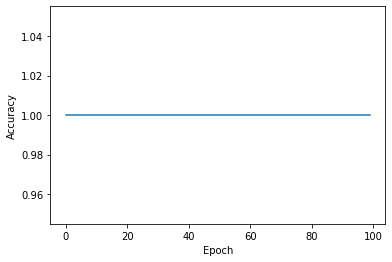

In [0]:
#Plot Accuracy Graph
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [0]:
# Print the final accuracy
 
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))

Test Accuracy:  0.6666667


In [0]:
# Print the final mean square error
 
pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))

MSE: 3.1407
